# Python Spotify project 

- Automating the creation of playlists!

In [56]:
import configparser

In [57]:
## create instance 
config = configparser.ConfigParser()
config.read('congif.ini')
## read the confi details
client_id = config['spotify']['client_id'] ## unique identifier for the app -- tells spotify who is making the request 
client_secret = config['spotify']['client_secret']## secret key by spotify for authentication purposes 
redirect_url = config['spotify']['redirect_url']

In [58]:
print(client_id)
print(redirect_url)

2e34ee32bd174dfd99af23aad888a216
http://localhost:8888/callback


Python package for spotify: Spotipy
- for generating playlist on the platform


In [59]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [60]:
scope = "playlist-read-private user-read-playback-state user-modify-playback-state user-read-currently-playing"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_url,
    scope=scope
))

## test to see if works 
try: 
    current_user = sp.current_user()
    print(f'Success: current user: {current_user["display_name"]}')
except spotipy.exceptions.SpotifyException as e:
    print(f'Error: Spotify Exception : {e}')
    print(f'{e.reason}')

Success: current user: Ian Petrus Tan


# My current no.1 playlist: insights

![Screenshot 2024-07-15 at 3.48.32 PM.png](<attachment:Screenshot 2024-07-15 at 3.48.32 PM.png>)
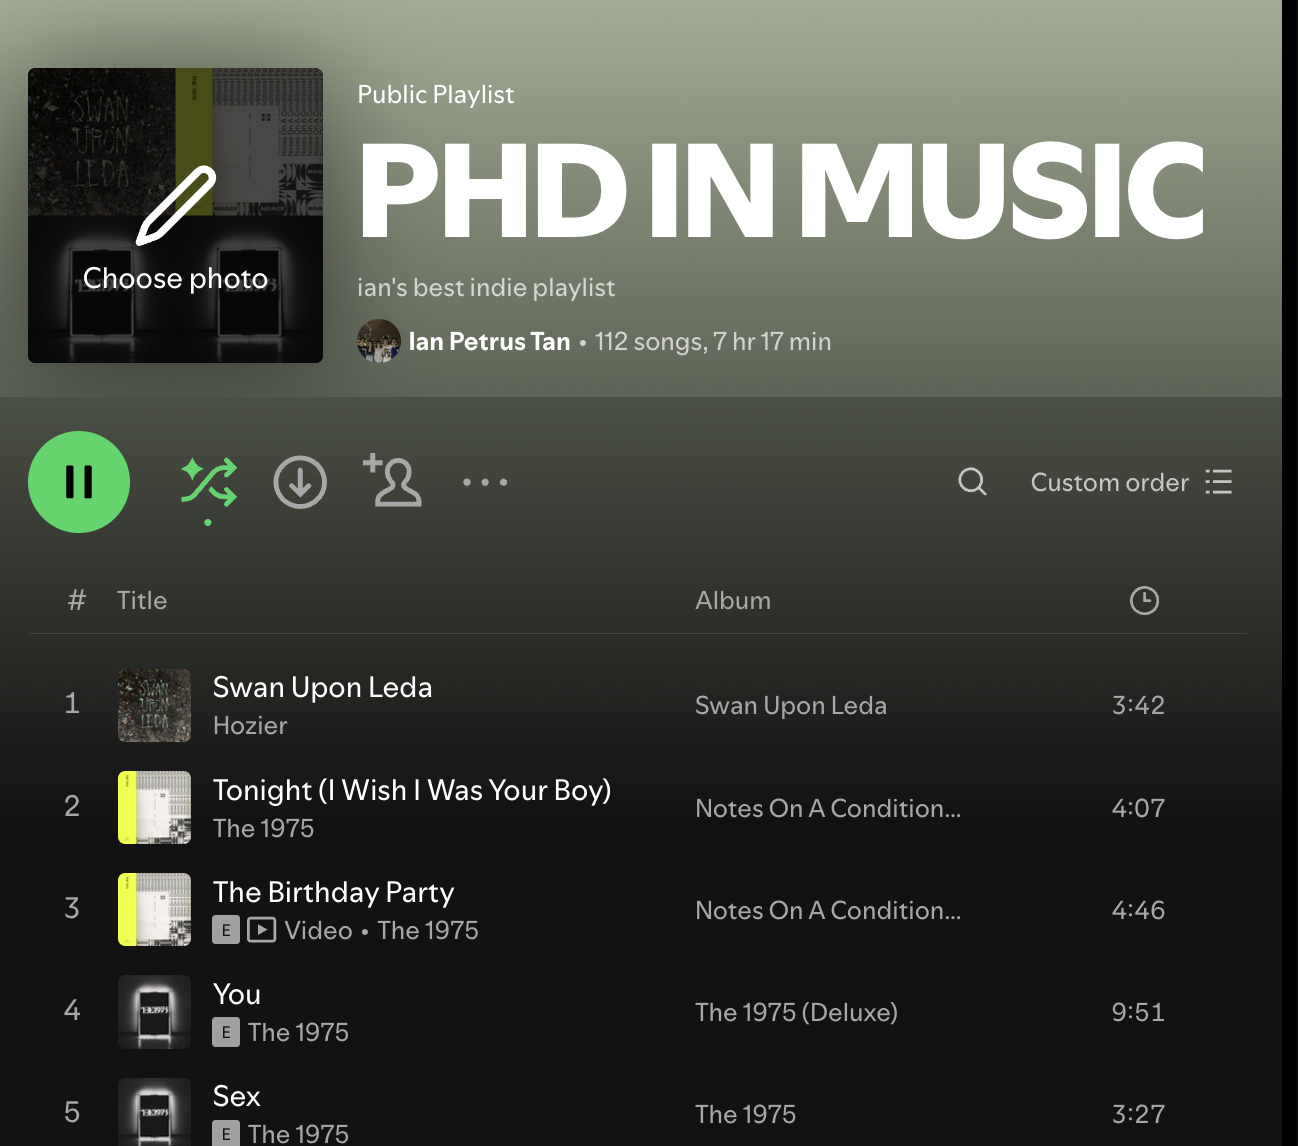

In [61]:
## use function to RETRIEVE USER PLAYLISTS
all_playlists = sp.current_user_playlists(limit = 10)
print(type(all_playlists))
all_names = [playlist['name'] for playlist in all_playlists['items']]

## get id for playlist text
for playlist in all_playlists['items']:
    if 'phd in music'.lower() in playlist['name'].lower():
        print(f"{playlist['name']} Found: ID = {playlist['id']}")

## Using a text search to get playlist id 
def get_playlist_id(playlist_name_text):
    all_playlists = sp.current_user_playlists()
    for playlist in all_playlists['items']:
        if 'phd in music'.lower() in playlist['name'].lower():
            print(f"{playlist['name']} Found: ID = {playlist['id']}")
            return(playlist['id'])

## After using api to get track list from a playlist
def get_songs_from_json(songs):
    track_info = []
    tracks = songs['items']
    for track_item in tracks:
        track = track_item['track']
        track_info.append({
            'track_name': track['name'],
            'artist_name': track['artists'][0]['name'], ## have to go one layer deeper 
            'album_name': track['album']['name'],
            'release_date': track['album']['release_date'],
            'song_popularity': track['popularity'],
            'artist_id': track['artists'][0]['id']

        })
    return track_info


<class 'dict'>
PHD IN MUSIC Found: ID = 3HR8fzqiphyPz3xHq0u9dG


In [62]:
phd_in_music_id = get_playlist_id('phd in music')

PHD IN MUSIC Found: ID = 3HR8fzqiphyPz3xHq0u9dG


In [63]:
## Get all tracks inside 
all_tracks = sp.playlist_tracks(phd_in_music_id)
all_tracks_titles = [song['track']['name'] for song in all_tracks['items']]
print(f'Current number of songs: {len(all_tracks_titles)}')

Current number of songs: 100


## Insights

In [64]:
all_tracks.keys()
len(all_tracks['items'])

100

In [65]:
track_items = all_tracks['items']
track_items[0]['track'].keys()



dict_keys(['preview_url', 'available_markets', 'explicit', 'type', 'episode', 'track', 'album', 'artists', 'disc_number', 'track_number', 'duration_ms', 'external_ids', 'external_urls', 'href', 'id', 'name', 'popularity', 'uri', 'is_local'])

Retrieve songs from playlist

In [66]:
## get all tracks from the playlist
results = sp.playlist_tracks(phd_in_music_id)
phd_track_info = get_songs_from_json(results)

tracks = results['items']
# track_info = []
# ## iterate through the tracks
# for item in tracks:
#     track = item['track']
#     track_info.append({
#         'track_name': track['name'],
#         'artist_name': track['artists'][0]['name'], ## have to go one layer deeper 
#         'album_name': track['album']['name'],
#         'release_date': track['album']['release_date'],
#         'song_popularity': track['popularity'],
#         'artist_id': track['artists'][0]['id']
#     })

In [67]:
import pandas as pd
phd_in_music_df = pd.DataFrame(phd_track_info)
phd_in_music_df['genre'] = [sp.artist(artist)['genres'] for artist in phd_in_music_df.artist_id]
phd_in_music_df.head()

,track_name,artist_name,album_name,release_date,song_popularity,artist_id,genre
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,56,2FXC3k01G6Gw61bmprjgqS,"[irish singer-songwriter, modern rock, pop, po..."
1,Tonight (I Wish I Was Your Boy),The 1975,Notes On A Conditional Form,2020-05-22,52,3mIj9lX2MWuHmhNCA7LSCW,"[modern alternative rock, modern rock, pop, po..."
2,The Birthday Party,The 1975,Notes On A Conditional Form,2020-05-22,50,3mIj9lX2MWuHmhNCA7LSCW,"[modern alternative rock, modern rock, pop, po..."
3,You,The 1975,The 1975 (Deluxe),2013-09-02,45,3mIj9lX2MWuHmhNCA7LSCW,"[modern alternative rock, modern rock, pop, po..."
4,Sex,The 1975,The 1975,2013-01-01,59,3mIj9lX2MWuHmhNCA7LSCW,"[modern alternative rock, modern rock, pop, po..."


Genres not appearing -- try different method (try request from scratch)

### Genres

In [68]:
from collections import Counter
import requests

#### Try different method

In [69]:
auth_url = 'https://accounts.spotify.com/api/token'
auth_response = requests.post(auth_url, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

## save the response data to json
auth_response_data = auth_response.json()

## save access token
access_token = auth_response_data['access_token']

headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}


In [71]:
import requests
BASE_URL = 'https://api.spotify.com/v1/'

## first get track uris 
genre_list = []

for track in tracks:
    track_uri = (track['track']['uri'])
    track_uri = track_uri.split(':')[-1]
    r = requests.get(BASE_URL+'tracks/' + track_uri, headers= headers)
    r = r.json()
    a_uri = r['artists'][0]['uri'].split(':')[2]
    
    s = requests.get(BASE_URL + 'artists/' + a_uri, headers=headers)
    s = s.json()
    genre_list.append(s['genres'])



In [72]:
## add genres back into df 
phd_in_music_df['genres'] = genre_list

# Saving checkpoint --------------

In [ ]:
## saving checkpoint 
import os
checkpoint_path = './checkpoints'
checkpoint_file_path = os.path.join(checkpoint_path, 'ian_playlist_data_phdinmusic.csv')
# ## Create folder if does not exist
# os.makedirs(checkpoint_path, exist_ok=True) ## only create if does not exist via exist_ok

# ## SAVE AND READ 
# phd_in_music_df.to_csv(checkpoint_file_path, 
#                        index=False)

import pandas as pd
phd_in_music_df = pd.read_csv(checkpoint_file_path)

# Saving checkpoint --------------

In [ ]:
all_genres = [genre for entry in phd_in_music_df.genres for genre in entry]
genre_counter = Counter(all_genres)
genre_counter_df = pd.DataFrame(genre_counter.items(), columns= ['genre', 'count']).sort_values('count', ascending=False)

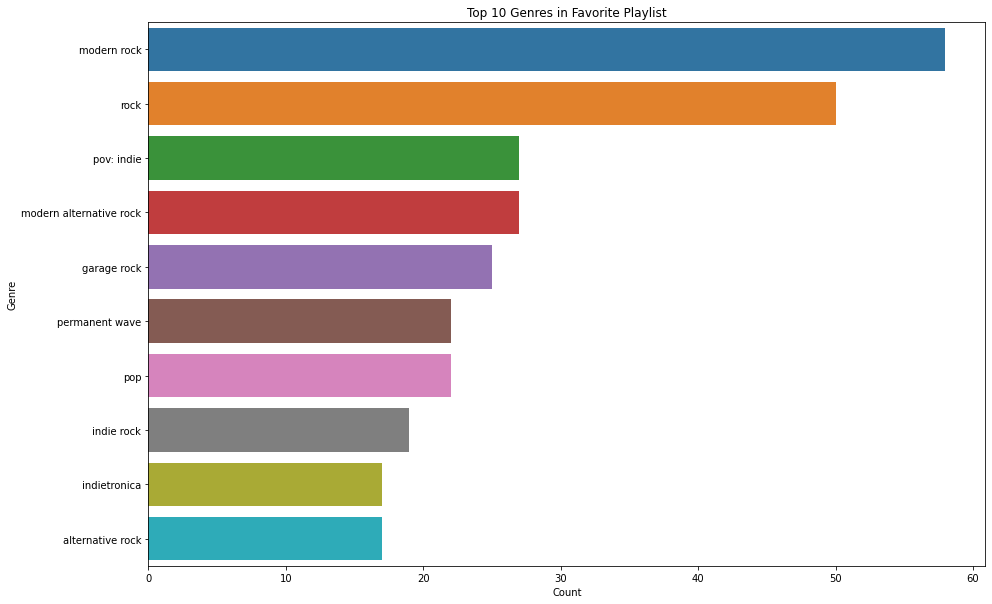

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='genre', data=genre_counter_df.sort_values(by='count', ascending=False).head(10))
plt.title('Top 10 Genres in Favorite Playlist')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


### Artists

In [ ]:
artists_counter = Counter(phd_in_music_df.artist_name)
artists_counter_df = pd.DataFrame(artists_counter.items(), columns=['artists', 'count']).sort_values('count', ascending=False).reset_index(drop=True)
artists_counter_df.head()

,artists,count
0,The 1975,16
1,The Strokes,13
2,Royel Otis,8
3,Arctic Monkeys,8
4,Unknown Mortal Orchestra,7


In [ ]:
isinstance(artists_counter, dict)

True

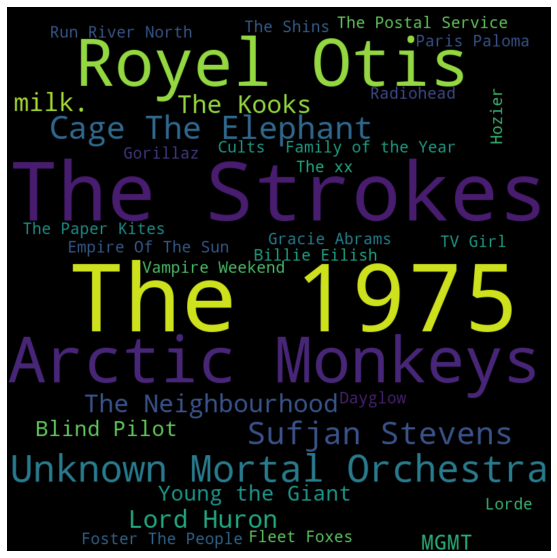

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(height= 800, width=800)
wordcloud.generate_from_frequencies(frequencies=artists_counter)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### By popularity 

In [ ]:
phd_artists = phd_in_music_df.artist_name.unique()
phd_artists_id = phd_in_music_df.artist_id.unique()
phd_artists_popularity = [sp.artist(phd_artist)['popularity'] for phd_artist in phd_artists_id]

In [ ]:
artists_df = pd.DataFrame({'artists':phd_artists, 'artist_popularity':phd_artists_popularity}).sort_values('artist_popularity', ascending=False)
artists_df_combined = artists_df.merge(artists_counter_df).set_index('artists')
artists_df_combined.head()

,artist_popularity,count
artists,,
Billie Eilish,94,1
Hozier,85,1
Arctic Monkeys,85,8
The Neighbourhood,83,3
Gracie Abrams,82,1


Text(0.5, 0, 'Spotify popularity ')

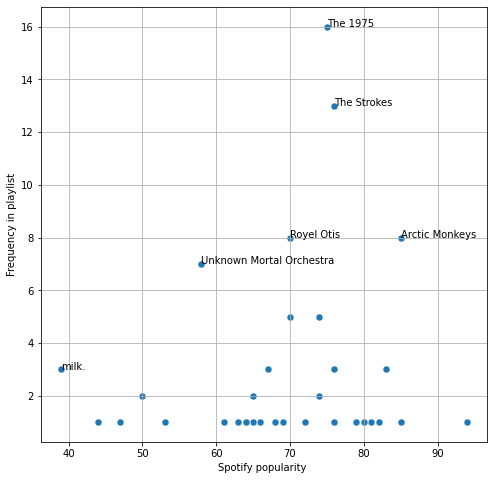

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = artists_df_combined, x = 'artist_popularity', y = 'count',
                s =50)
top_artists_count = artists_df_combined.nlargest(5, 'count')## my two favourite artists
bottom_artists_pop = artists_df_combined.nsmallest(1, 'artist_popularity')## my two favourite artists

for i, row in pd.concat([top_artists_count, bottom_artists_pop]).iterrows():
    plt.annotate(i, ## annotate the text of the name -- use index since we had set index
                 (row['artist_popularity'], row['count']))
plt.grid(True)
plt.ylabel('Frequency in playlist')
plt.xlabel('Spotify popularity ')

In [ ]:
artists_song_pop_avg = phd_in_music_df.groupby('artist_name')['song_popularity'].mean()
artists_df_combined['playlist_avg_popularity'] = artists_song_pop_avg

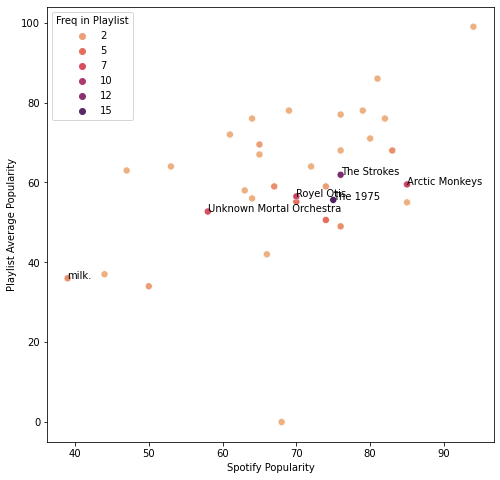

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = artists_df_combined, x = 'artist_popularity', 
                y = 'playlist_avg_popularity',
                hue ='count', s = 50, palette='flare')
for i, row in pd.concat([top_artists_count, bottom_artists_pop]).iterrows():
    plt.annotate(i, ## annotate the text of the name -- use index since we had set index
                 (row['artist_popularity'], row['playlist_avg_popularity']))

plt.ylabel('Playlist Average Popularity')
plt.xlabel('Spotify Popularity')
plt.legend(title = 'Freq in Playlist')

plt.show()

## All songs

Index(['The 1975', 'The Strokes', 'Royel Otis', 'Arctic Monkeys',
       'Unknown Mortal Orchestra'],
      dtype='object', name='artist_name')


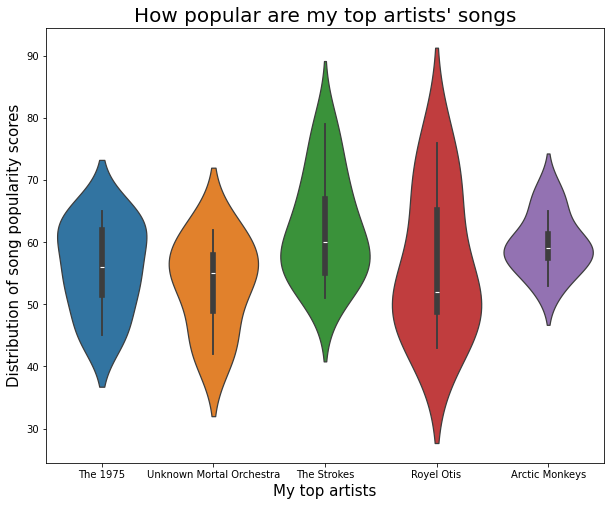

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
## Filter for artists with at least 10 songs 
significant_artists = phd_in_music_df.artist_name.value_counts().index[phd_in_music_df.artist_name.value_counts() > 5]
print(significant_artists)

plt.figure(figsize=(10,8))
sns.violinplot(data = phd_in_music_df[phd_in_music_df.artist_name.isin(significant_artists)], 
              x = 'artist_name',
              hue = 'artist_name',
              y = 'song_popularity')
plt.xlabel('My top artists', fontsize = 15)
plt.ylabel('Distribution of song popularity scores', fontsize = 15)
plt.title("How popular are my top artists' songs", fontsize = 20)
plt.show()

# Visualising my kind of music - track features

We can visualise or quantify the music in terms of features such as tempo, acousticness, energy, liveness, valence. The definition, taken from the [spotify documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features), are the following: 

* danceability: based on a combination of elements such as tempo, rhythm stability, beat strength, overall regularity, such that the music becomes suitable for *dancing*
* energy: perceptual measure of intensity and activity, i.e. how fast, loud, noisy a song is. e.g. classical music like Bach would rank low on this while death metal would be high 
* liveness: whether the song was recorded live 
* tempo: the overall tempo i.e. the number of beats per min (BPM) - higher BPM helps with exercise. 
* valence: how cheerful/positive the song is, as opposed to sad or negative

In [ ]:
## testing 
sample_track_id = tracks[0]['track']['id']
sp.audio_features(sample_track_id)[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [ ]:
## Get audio features from list of songs id 
def get_audio_features(tracks):
    list_of_dicts_song_features = []
    for item in tracks:
        track_id = (item['track']['id'])
        ## call sp.audio_features function
        audio_features = sp.audio_features(track_id)[0]
        audio_features['song'] = item['track']['name']
        audio_features['artist'] = item['track']['artists'][0]['name']
        list_of_dicts_song_features.append(audio_features)
    return pd.DataFrame(list_of_dicts_song_features)


In [ ]:
## Run a for loop that calls the spotipy funciton to get audio features of each song 
music_features = get_audio_features(tracks)

In [ ]:
# music_features = pd.DataFrame(list_of_dicts_song_features)
music_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song,artist
0,0.351,0.4100,2,-8.660,1,0.0327,0.494000,0.440000,0.131,0.129,125.995,audio_features,3JtVtwLYCy9WXcHLQyzRnl,spotify:track:3JtVtwLYCy9WXcHLQyzRnl,https://api.spotify.com/v1/tracks/3JtVtwLYCy9W...,https://api.spotify.com/v1/audio-analysis/3JtV...,222026,4,Swan Upon Leda,Hozier
1,0.478,0.4560,7,-6.844,1,0.0529,0.122000,0.000020,0.214,0.268,171.900,audio_features,7DmTaJoM7L020qm3egqNsM,spotify:track:7DmTaJoM7L020qm3egqNsM,https://api.spotify.com/v1/tracks/7DmTaJoM7L02...,https://api.spotify.com/v1/audio-analysis/7DmT...,247265,4,Tonight (I Wish I Was Your Boy),The 1975
2,0.627,0.4950,2,-8.934,1,0.0287,0.068100,0.104000,0.124,0.452,134.010,audio_features,3wFPsw1WQJevCFoKpoLyTF,spotify:track:3wFPsw1WQJevCFoKpoLyTF,https://api.spotify.com/v1/tracks/3wFPsw1WQJev...,https://api.spotify.com/v1/audio-analysis/3wFP...,285833,4,The Birthday Party,The 1975
3,0.215,0.0132,0,-6.102,1,0.0567,0.006620,0.004130,0.159,0.966,137.960,audio_features,1vrXDFIfPVfDOH2rM7gFnc,spotify:track:1vrXDFIfPVfDOH2rM7gFnc,https://api.spotify.com/v1/tracks/1vrXDFIfPVfD...,https://api.spotify.com/v1/audio-analysis/1vrX...,591160,5,You,The 1975
4,0.410,0.9740,2,-4.139,1,0.1250,0.000013,0.000049,0.526,0.173,148.298,audio_features,67ispalOAo3jnZWYSTTfZk,spotify:track:67ispalOAo3jnZWYSTTfZk,https://api.spotify.com/v1/tracks/67ispalOAo3j...,https://api.spotify.com/v1/audio-analysis/67is...,207002,4,Sex,The 1975


In [118]:
## Saving checkpoint 
# music_features.to_csv('checkpoints/playlist_music_features.csv', 
#                       index=False)
import pandas as pd
music_features = pd.read_csv('checkpoints/playlist_music_features.csv')

In [ ]:
music_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.556890,0.669362,5.160000,-6.98552,0.810000,0.044031,0.221516,0.187775,0.156146,0.499500,125.054200,233121.900000,3.940000
std,0.157369,0.219760,3.670026,3.25544,0.394277,0.019464,0.295493,0.286786,0.100508,0.241075,25.502724,57627.414202,0.467532
min,0.174000,0.013200,0.000000,-20.69600,0.000000,0.024200,0.000002,0.000000,0.029900,0.039800,73.543000,133267.000000,1.000000
25%,0.462750,0.499500,2.000000,-8.27375,1.000000,0.031650,0.005910,0.000144,0.094675,0.307250,105.086000,205536.500000,4.000000
50%,0.544000,0.721000,5.000000,-6.09500,1.000000,0.037650,0.055200,0.019800,0.118000,0.523000,122.666000,223863.500000,4.000000
75%,0.660500,0.875000,8.250000,-4.99600,1.000000,0.051350,0.356250,0.272000,0.173250,0.646750,140.362500,255699.750000,4.000000
max,0.956000,0.974000,11.000000,-0.73400,1.000000,0.139000,0.993000,0.911000,0.526000,0.968000,180.060000,591160.000000,5.000000


Number of audio features: 10


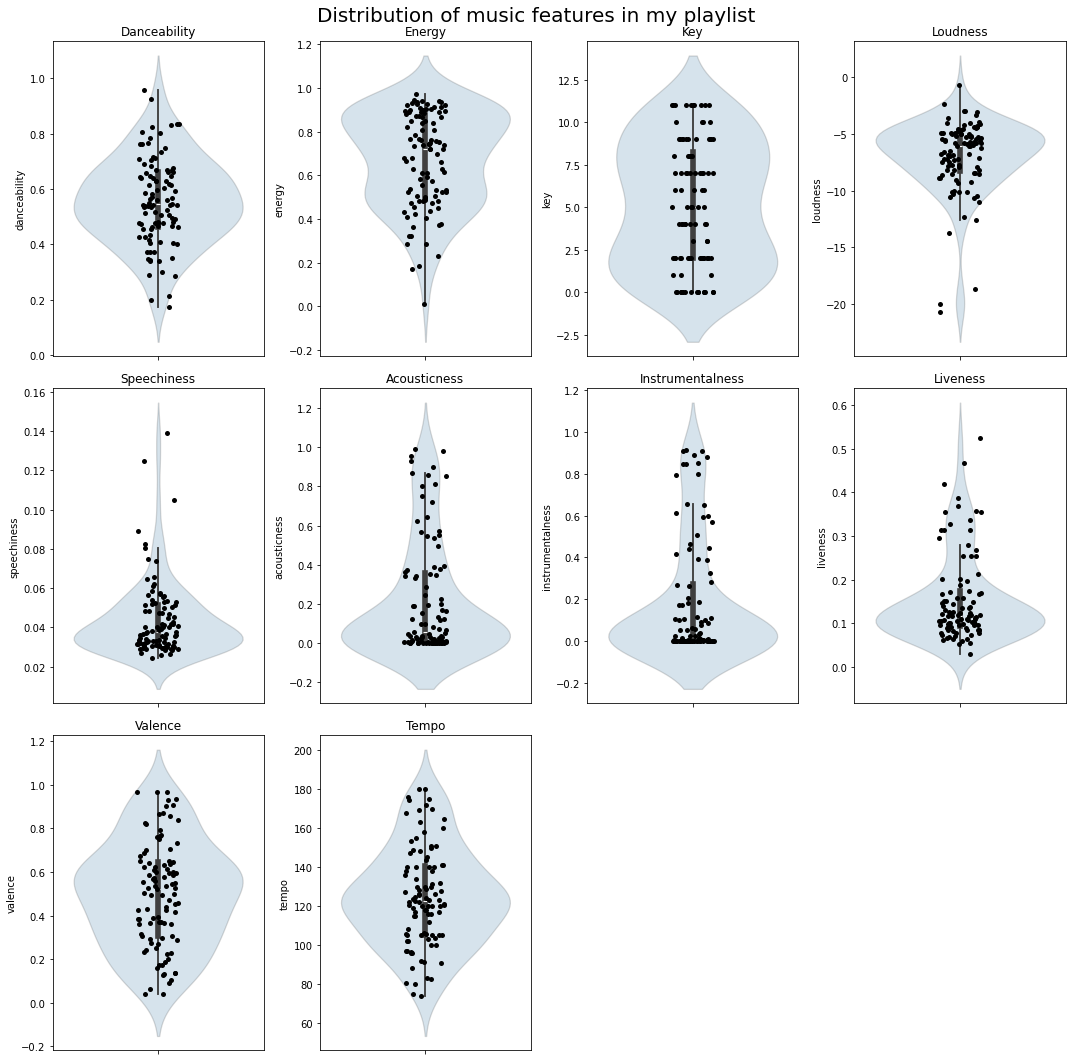

In [144]:
# Plot distribution of audio features
import matplotlib.pyplot as plt
import seaborn as sns
audio_features = ['danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
print(f'Number of audio features: {len(audio_features)}')
plt.figure(figsize=(15, 15))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 4, i+1)
    # feature_data = music_features[feature].to_numpy()
    # plt.sca÷(music_features[feature])
    sns.violinplot(music_features[feature], 
                   alpha = 0.2)
    sns.stripplot(music_features[feature], 
                  jitter = 0.1, 
                  color = 'black')
    plt.title(f'{feature.capitalize()}')
## add overall title
plt.suptitle('Distribution of music features in my playlist', fontsize = 20)
plt.tight_layout()
plt.show()

My type of music tends to be

* normal/symmetrical in danceability, key, valence and tempo
* **high** in energy, loudness
* **low** in speechiness, acousticness, instrumentalness, liveness

## What is the distribution of my top artists?

In [122]:
top_3_artists = phd_in_music_df.artist_name.value_counts().head(3).index
# music_features_top_subset = music_features[music_features.artist.isin(top_3_artists)]
# music_features_else = music_features[~music_features.artist.isin(top_3_artists)]
# print(music_features.shape)
# print(music_features_top_subset.shape)

## Create a new col that says if the song is by a top artist
music_features['top_3_artists'] = music_features['artist'].isin(top_3_artists)

print(f'My top 3 artists: {top_3_artists.tolist()}')



My top 3 artists: ['The 1975', 'The Strokes', 'Royel Otis']


Number of audio features: 10


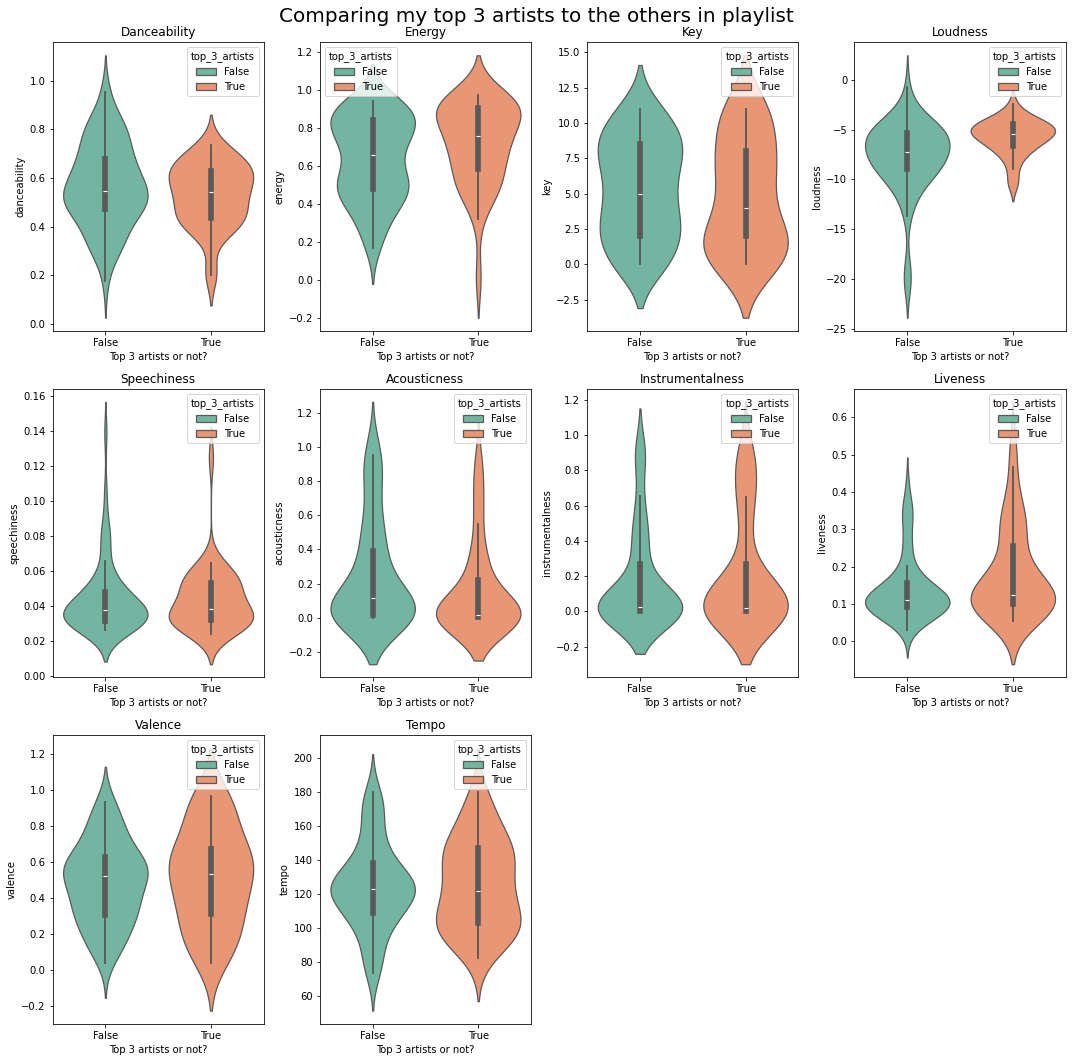

In [123]:
# Plot distribution of audio features
import matplotlib.pyplot as plt
import seaborn as sns
audio_features = ['danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
print(f'Number of audio features: {len(audio_features)}')
plt.figure(figsize=(15, 15))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 4, i+1)
    # feature_data = music_features[feature].to_numpy()
    # plt.sca÷(music_features[feature])
    sns.violinplot(y = music_features[feature],x = music_features['top_3_artists'], 
                   hue=music_features['top_3_artists'], 
                   palette='Set2')
    plt.title(f'{feature.capitalize()}')
    # sns.stripplot(music_features_else[feature], 
    #               jitter = 0.1, 
    #               color = 'grey')
    plt.title(f'{feature.capitalize()}')
    plt.xlabel('Top 3 artists or not?')
## Add overall title for all plots
plt.suptitle('Comparing my top 3 artists to the others in playlist', fontsize = 20)
plt.tight_layout()
plt.show()

I cannot really see a significant difference between the features for my top 3 artists within the playlist and the other artists inside. Perhaps there is already a self selection bias that is causing similar features amongst all the songs in the playlist. Let us compare with a selection of mainstream songs to see if there is a discernable difference between my taste and the average taste. 

### Sample some mainstream music for comparison -- Top 50 Global

![Screenshot 2024-07-18 at 12.45.12 PM.png](<attachment:Screenshot 2024-07-18 at 12.45.12 PM.png>)
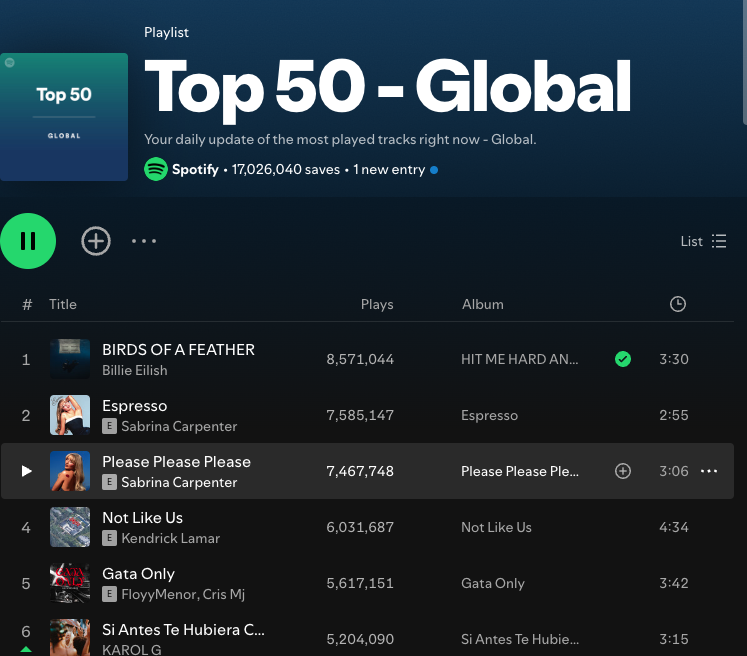

In [ ]:
top_50_songs = sp.playlist_tracks(playlist_id='37i9dQZEVXbMDoHDwVN2tF', limit=len(phd_in_music_df))

In [94]:
top_50_songs_info = get_songs_from_json(top_50_songs)
## check 
top_50_songs_info_df = pd.DataFrame(top_50_songs_info)
top_50_songs_info_df.head()

,track_name,artist_name,album_name,release_date,song_popularity,artist_id
0,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,2024-05-17,99,6qqNVTkY8uBg9cP3Jd7DAH
1,Espresso,Sabrina Carpenter,Espresso,2024-04-12,99,74KM79TiuVKeVCqs8QtB0B
2,Please Please Please,Sabrina Carpenter,Please Please Please,2024-06-06,99,74KM79TiuVKeVCqs8QtB0B
3,Not Like Us,Kendrick Lamar,Not Like Us,2024-05-04,97,2YZyLoL8N0Wb9xBt1NhZWg
4,Gata Only,FloyyMenor,Gata Only,2024-02-02,96,7CvTknweLr9feJtRGrpDBy


Get song id from song and artist name

In [113]:
top_50_songs_info

## Write a function that searches for the song id
list_track_ids = [] 
for song in top_50_songs_info:
    artist = song['artist_name']
    track = song['track_name']
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')['tracks']['items'][0]['id']
    list_track_ids.append(track_id)
top_50_songs_info_df['track_id'] = list_track_ids

## check 
top_50_songs_info_df['track_id'].head()

0    6dOtVTDdiauQNBQEDOtlAB
1    2qSkIjg1o9h3YT9RAgYN75
2    5N3hjp1WNayUPZrA8kJmJP
3    6AI3ezQ4o3HUoP6Dhudph3
4    6XjDF6nds4DE2BBbagZol6
Name: track_id, dtype: object

In [116]:
## Get audio features 
temp_holder = []
for track_id in top_50_songs_info_df['track_id']:
    temp_holder.append(sp.audio_features(track_id)[0]) ## somehow the result is a list of dictionary, therefore need to access the (only) element of the list
music_features_top_50 = pd.DataFrame(temp_holder)
music_features_top_50.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.747,0.507,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,audio_features,6dOtVTDdiauQNBQEDOtlAB,spotify:track:6dOtVTDdiauQNBQEDOtlAB,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,https://api.spotify.com/v1/audio-analysis/6dOt...,210373,4
1,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,audio_features,2qSkIjg1o9h3YT9RAgYN75,spotify:track:2qSkIjg1o9h3YT9RAgYN75,https://api.spotify.com/v1/tracks/2qSkIjg1o9h3...,https://api.spotify.com/v1/audio-analysis/2qSk...,175459,4
2,0.669,0.586,9,-6.073,1,0.0540,0.2740,0.000000,0.1040,0.579,107.071,audio_features,5N3hjp1WNayUPZrA8kJmJP,spotify:track:5N3hjp1WNayUPZrA8kJmJP,https://api.spotify.com/v1/tracks/5N3hjp1WNayU...,https://api.spotify.com/v1/audio-analysis/5N3h...,186365,4
3,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,audio_features,6AI3ezQ4o3HUoP6Dhudph3,spotify:track:6AI3ezQ4o3HUoP6Dhudph3,https://api.spotify.com/v1/tracks/6AI3ezQ4o3HU...,https://api.spotify.com/v1/audio-analysis/6AI3...,274192,4
4,0.791,0.499,8,-8.472,0,0.0509,0.4460,0.000024,0.0899,0.669,99.986,audio_features,6XjDF6nds4DE2BBbagZol6,spotify:track:6XjDF6nds4DE2BBbagZol6,https://api.spotify.com/v1/tracks/6XjDF6nds4DE...,https://api.spotify.com/v1/audio-analysis/6XjD...,222000,4


In [137]:
## Combine the two into a large df

## 1. make a new column that shows which source the data is from 
music_features_top_50['source'] = 'Spotify Top 50'
music_features['source'] = 'My playlist'

## 2. Combine them now 
music_features_combined = pd.concat([music_features, music_features_top_50], axis = 0)
music_features_combined.shape ## correct 

(150, 23)

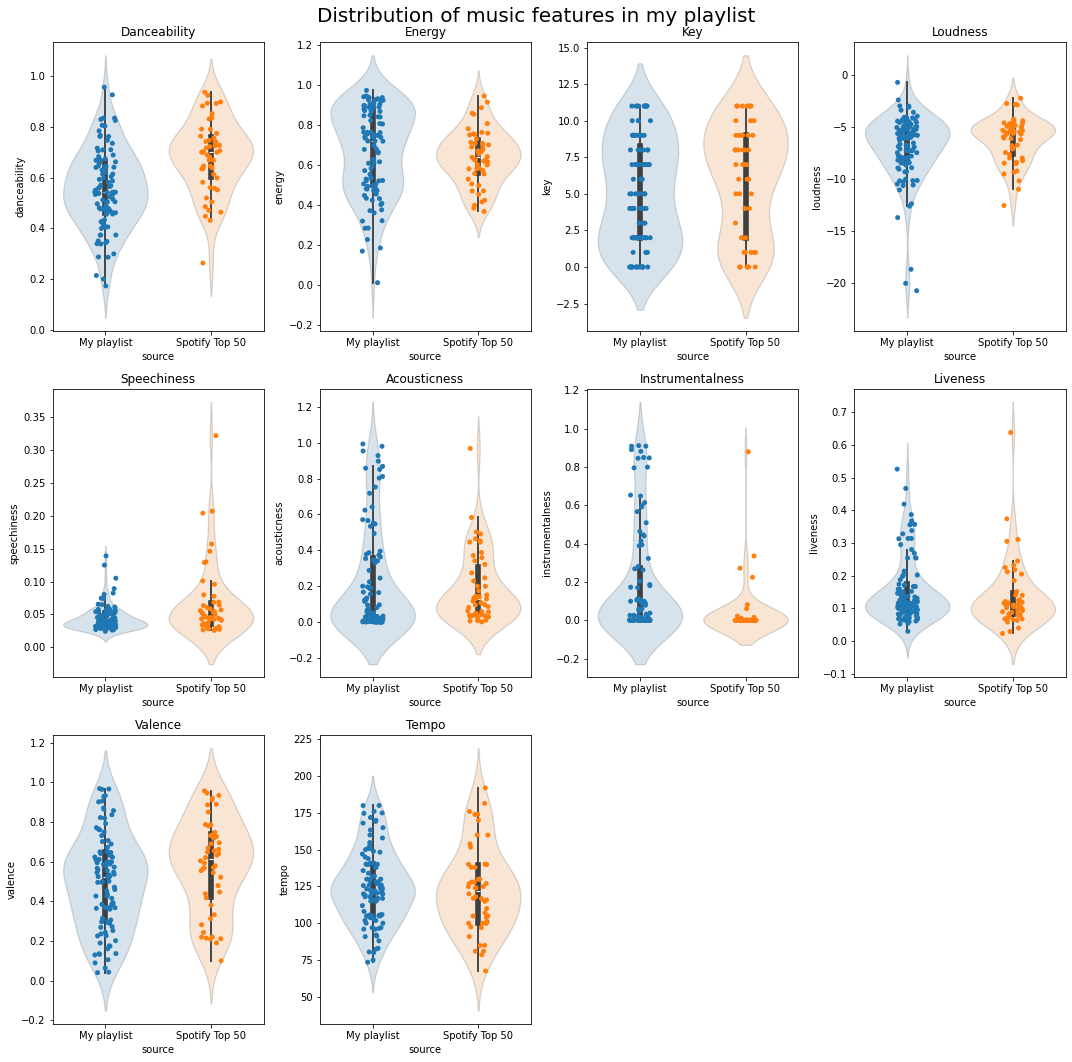

In [139]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(audio_features):
    plt.subplot(3, 4, i+1)
    # feature_data = music_features[feature].to_numpy()
    # plt.sca÷(music_features[feature])
    sns.violinplot(data = music_features_combined, x = 'source',
                hue = 'source',
                y = feature, 
                # showfliers = False, 
                legend=False, alpha = .2)
    sns.stripplot(data = music_features_combined, x = 'source',
                hue = 'source',
                y = feature)
    # sns.catplot(music_features_combined[feature], 
    #               jitter = 0.1, 
                    
    #               hue = music_features_combined['my_playlist'],
    #               color = 'black')
    plt.title(f'{feature.capitalize()}')
## add overall title
plt.suptitle('Distribution of music features in my playlist', fontsize = 20)
plt.tight_layout()
plt.show()